In [1]:
import sys
import traceback
import pandas as pd
import numpy as np
import time
from copy import deepcopy

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from scipy import sparse

import pickle

from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
pd.set_option('display.width', 15000)
pd.set_option('display.max_columns', 100)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context('poster')
%matplotlib inline

In [2]:
from surprise import Dataset, Reader
from surprise import NormalPredictor, BaselineOnly, SVD, SVDpp, NMF, \
SlopeOne, CoClustering, KNNBasic, KNNWithMeans, KNNBaseline

In [3]:
from recommender import plot_cm, print_results, IO
from recommender import ModeClassifier, BaselineMean, BaselineRegression, ALS1, ALS2, RS_surprise

In [4]:
%%time
# Load data

fig_dir = 'figs/modeling/Cleveland/'

data_dir = 'data/Cleveland/'
dfb = pd.read_pickle(data_dir + 'business.pkl')
dfr = pd.read_pickle(data_dir + 'review.pkl')
dfu = pd.read_pickle(data_dir + 'user.pkl')
datar = pd.read_pickle(data_dir + 'data_review.pkl')

Wall time: 160 ms


In [5]:
print(dfb.shape)
print(dfu.shape)
print(datar.shape)

del dfb
del dfu
del dfr

datar.head()

(2500, 93)
(30131, 22)
(75932, 3)


,user_id,business_id,stars
0,172,12,5
1,173,12,4
2,174,12,4
3,175,12,1
4,176,12,1


In [6]:
# Split the dataset into a training set a test set

X_train, X_test, y_train, y_test = train_test_split(datar[['user_id', 'business_id']].values, datar['stars'].values, \
                                                   test_size=0.4, random_state=0)

In [7]:
models = [ModeClassifier(), RS_surprise(NormalPredictor()), BaselineMean(), BaselineRegression(), \
          RS_surprise(BaselineOnly()), RS_surprise(KNNBasic()), RS_surprise(KNNWithMeans()), RS_surprise(KNNBaseline()), \
          ALS1(), ALS2(), RS_surprise(SVD()), RS_surprise(SVDpp()), RS_surprise(NMF()), RS_surprise(SlopeOne()), \
          RS_surprise(CoClustering())]
model_names = ['Mode estimator', 'Normal predictor*', 'Baseline (mean)', 'Baseline (regression)', \
              'Baseline (ALS)*', 'KNN (basic)*', 'KNN (with means)*', 'KNN (baseline)*', \
              'SVD-ALS1', 'SVD-ALS2', 'SVD-SGD*', 'SVD++-SGD*', 'NMF-SGD*', 'Slope one*', 'Co-clustering*']
test = [True, True, True, True, \
       True, True, True, True, \
       True, True, True, True, True, True, True]
fignames = [fig_dir + str(i) + 'cm.png' for i in range(len(models))]

In [8]:
%%time

estimators = []
is_successful = []

for i, model in enumerate(models):
    try:
        print(model_names[i] + '...')
        if not test[i]:
            print('Estimator not tested')
            estimators.append(model)
            is_successful.append(False)
            print()
            continue
        model.fit(X_train, y_train)
        estimators.append(model)
        print(model_names[i] + ' successful.')
        is_successful.append(True)
        print()
    except:
        traceback.print_exc()
        print(model_names[i] + ' failed.')
        is_successful.append(False)
        print()

try:
    IO(data_dir + 'results/estimators.pkl').to_pickle(estimators)
    print('Saving to pickle successful.')
except:
    traceback.print_exc()
    print('Saving to pickle failed')

IO(data_dir + 'results/is_successful.pkl').to_pickle(is_successful)

Mode estimator...
Mode estimator successful.

Normal predictor*...
Normal predictor* successful.

Baseline (mean)...
Baseline (mean) successful.

Baseline (regression)...
Baseline (regression) successful.

Baseline (ALS)*...
Estimating biases using als...
Baseline (ALS)* successful.

KNN (basic)*...
Computing the msd similarity matrix...
Done computing similarity matrix.
KNN (basic)* successful.

KNN (with means)*...
Computing the msd similarity matrix...
Done computing similarity matrix.
KNN (with means)* successful.

KNN (baseline)*...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
KNN (baseline)* successful.

SVD-ALS1...
SVD-ALS1 successful.

SVD-ALS2...
SVD-ALS2 successful.

SVD-SGD*...
SVD-SGD* successful.

SVD++-SGD*...
SVD++-SGD* successful.

NMF-SGD*...
NMF-SGD* successful.

Slope one*...
Slope one* successful.

Co-clustering*...
Co-clustering* successful.

Saving to pickle successful.
Wall time: 5min 1s


Mode estimator
Fitting time: 0.0 s.
RMSE on training set: 1.8152019684014142.
RMSE on test set: 1.8218756532380183.
r2 on training set: -0.8226456670927758.
r2 on test set: -0.8254812549947299.
Classification accuracy on training set: 0.4056059176013521.
Classification accuracy on test set: 0.4053600237052645.


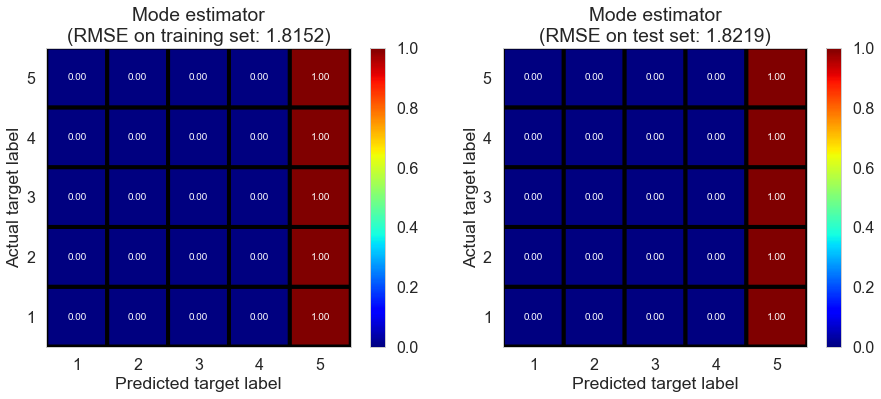


Normal predictor*
Fitting time: 0.2048048973083496 s.
RMSE on training set: 1.7513950964054918.
RMSE on test set: 1.7551452971134336.
r2 on training set: -0.6940666193121099.
r2 on test set: -0.6859505563571395.
Classification accuracy on training set: 0.24820562347724928.
Classification accuracy on test set: 0.24182662232904223.


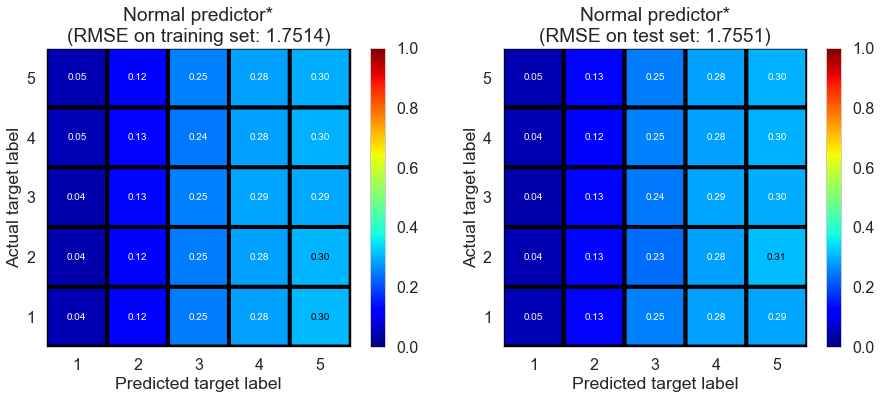


Baseline (mean)
Fitting time: 0.04680013656616211 s.
RMSE on training set: 0.8908266063597082.
RMSE on test set: 1.3449187341504185.
r2 on training set: 0.5610261000959897.
r2 on test set: 0.005208651223182925.
Classification accuracy on training set: 0.5967865844289822.
Classification accuracy on test set: 0.35577651203371413.


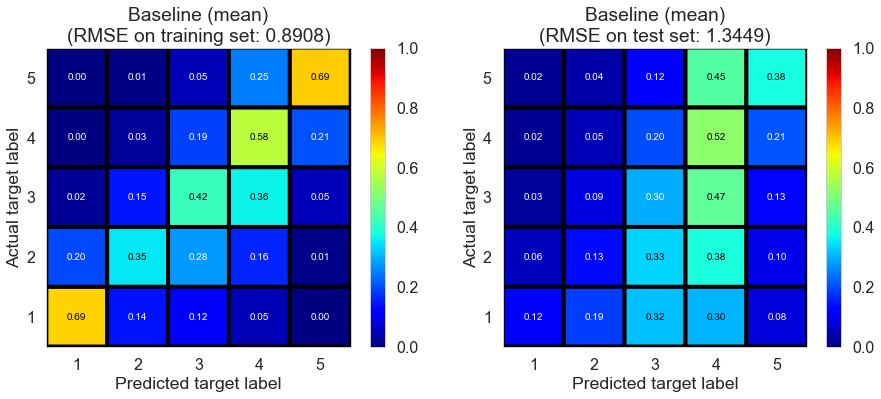


Baseline (regression)
Fitting time: 0.14040017127990723 s.
RMSE on training set: 0.8088154126766707.
RMSE on test set: 1.2265031981639047.
r2 on training set: 0.6381311694777939.
r2 on test set: 0.1726728370298688.
Classification accuracy on training set: 0.48218793213196076.
Classification accuracy on test set: 0.3271655746880453.


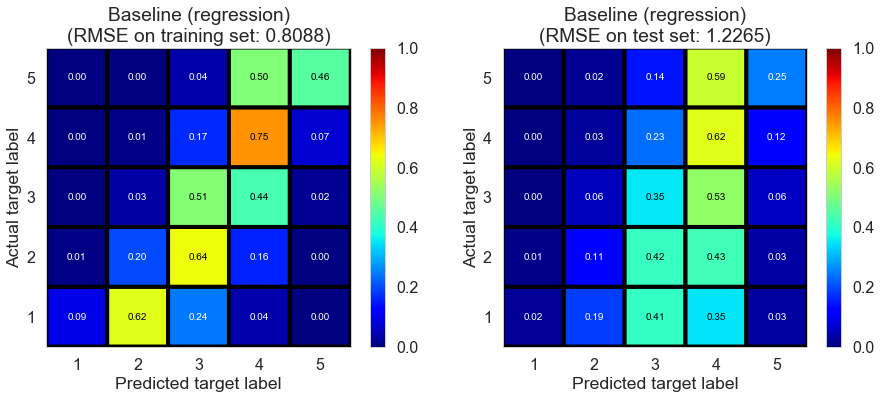


Baseline (ALS)*
Fitting time: 0.268601655960083 s.
RMSE on training set: 1.1171352200705122.
RMSE on test set: 1.218708562102183.
r2 on training set: 0.3096587445488872.
r2 on test set: 0.1831550319598756.
Classification accuracy on training set: 0.30764503171711405.
Classification accuracy on test set: 0.28897375958910876.


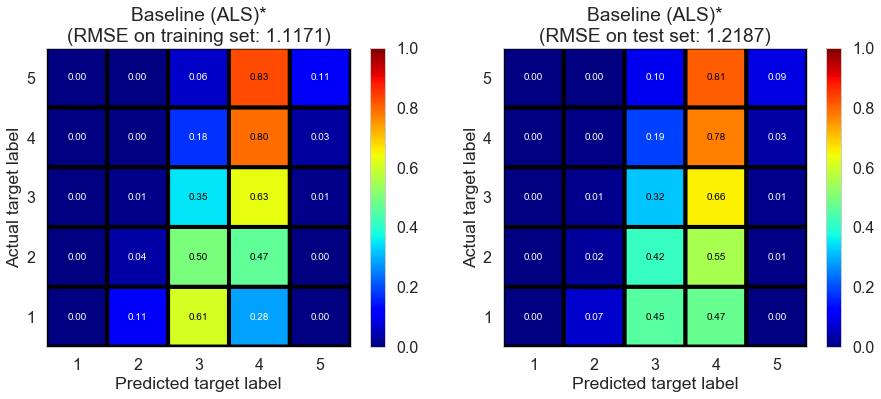


KNN (basic)*
Fitting time: 12.972322463989258 s.
RMSE on training set: 0.39518485210095206.
RMSE on test set: 1.3490250915575526.
r2 on training set: 0.9136120997237025.
r2 on test set: -0.000875292603872424.
Classification accuracy on training set: 0.8362343335016132.
Classification accuracy on test set: 0.29391235636914365.


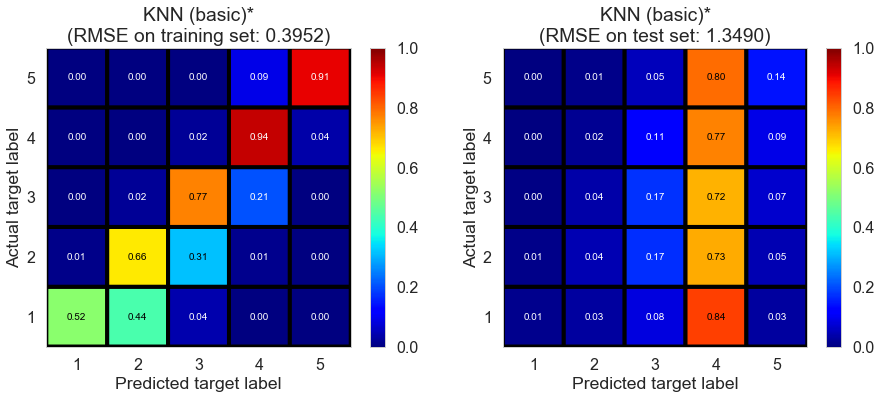


KNN (with means)*
Fitting time: 12.178725481033325 s.
RMSE on training set: 0.5600212957038789.
RMSE on test set: 1.407187004427234.
r2 on training set: 0.8265152023156396.
r2 on test set: -0.0890392811032501.
Classification accuracy on training set: 0.7087293399767335.
Classification accuracy on test set: 0.3128436440259441.


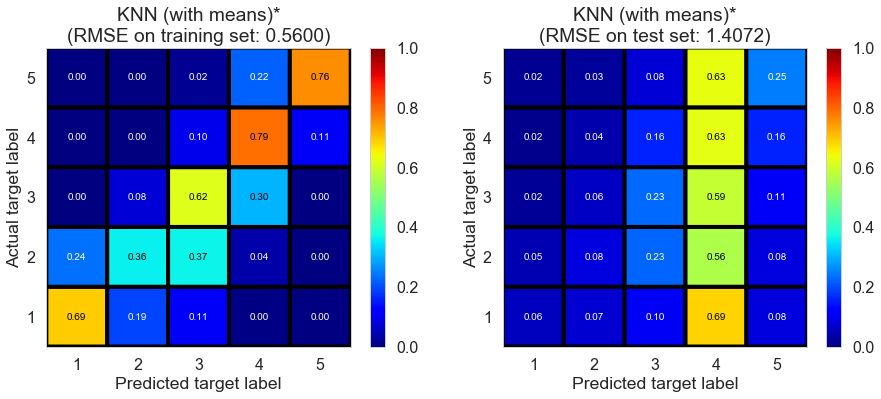


KNN (baseline)*
Fitting time: 12.16537070274353 s.
RMSE on training set: 0.3836729289351976.
RMSE on test set: 1.2627439444819601.
r2 on training set: 0.9185718337246752.
r2 on test set: 0.12305874323016364.
Classification accuracy on training set: 0.8416997739195329.
Classification accuracy on test set: 0.30029960820465545.


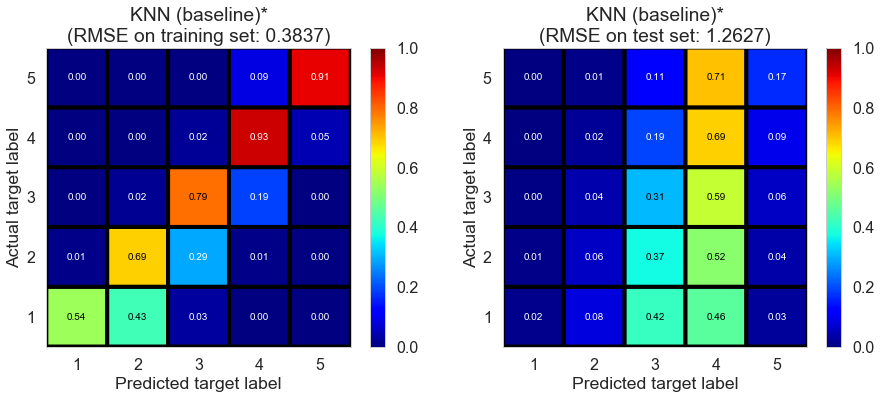


SVD-ALS1
Fitting time: 78.5957818031311 s.
RMSE on training set: 0.5680302313558975.
RMSE on test set: 1.2132468681102921.
r2 on training set: 0.8215176645817497.
r2 on test set: 0.19046007684429334.
Classification accuracy on training set: 0.7085976426172655.
Classification accuracy on test set: 0.30118855562506175.


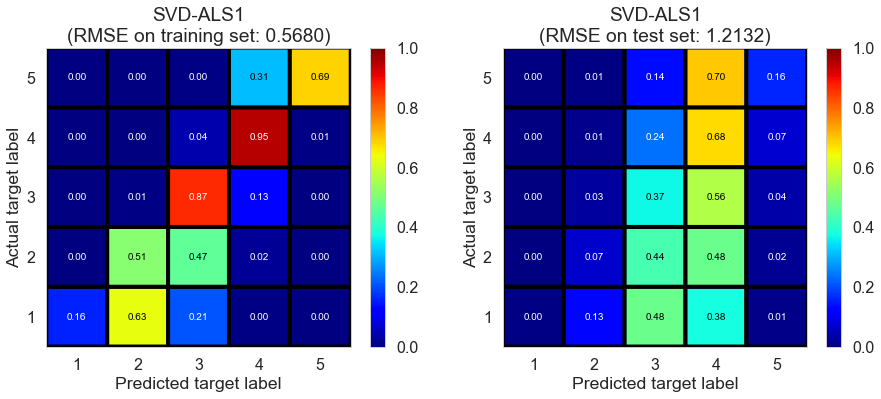


SVD-ALS2
Fitting time: 81.37107443809509 s.
RMSE on training set: 0.5695588707015288.
RMSE on test set: 1.216372903408628.
r2 on training set: 0.8205557360723028.
r2 on test set: 0.18628300346972437.
Classification accuracy on training set: 0.7034175464781931.
Classification accuracy on test set: 0.2940440522832779.


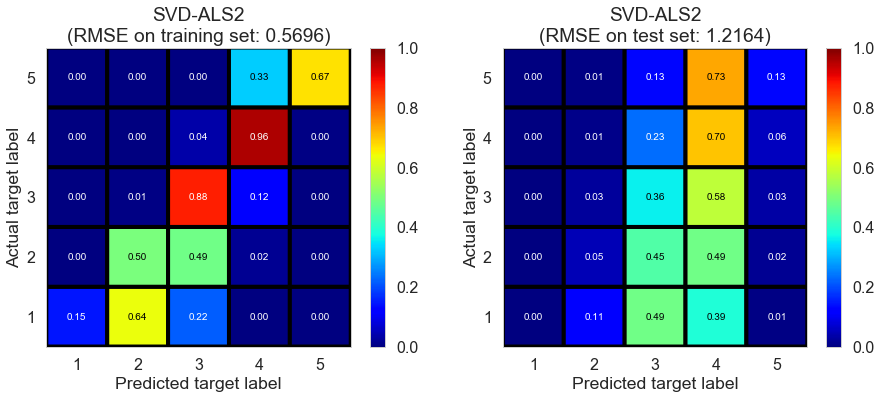


SVD-SGD*
Fitting time: 3.8831961154937744 s.
RMSE on training set: 0.8239429229119544.
RMSE on test set: 1.2214911307253182.
r2 on training set: 0.6244683067518872.
r2 on test set: 0.17942071510217394.
Classification accuracy on training set: 0.4459492087183652.
Classification accuracy on test set: 0.3004313041187897.


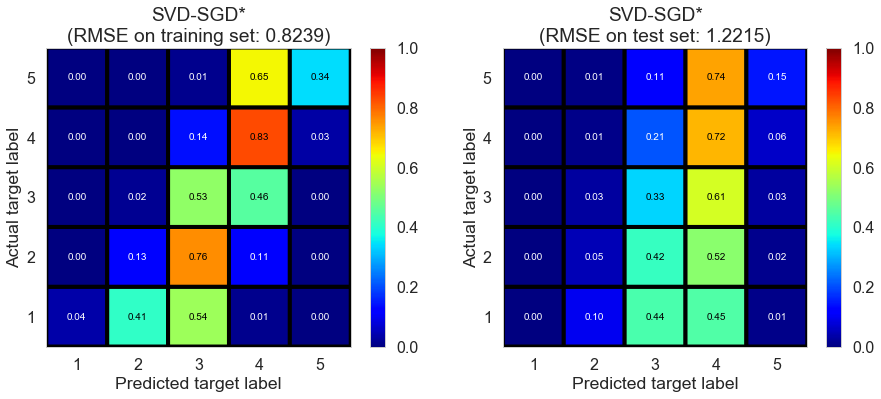


SVD++-SGD*
Fitting time: 15.290627479553223 s.
RMSE on training set: 0.8628197871202155.
RMSE on test set: 1.2243771819379057.
r2 on training set: 0.58819413050341.
r2 on test set: 0.175538523039237.
Classification accuracy on training set: 0.44182269145503633.
Classification accuracy on test set: 0.3010239357323939.


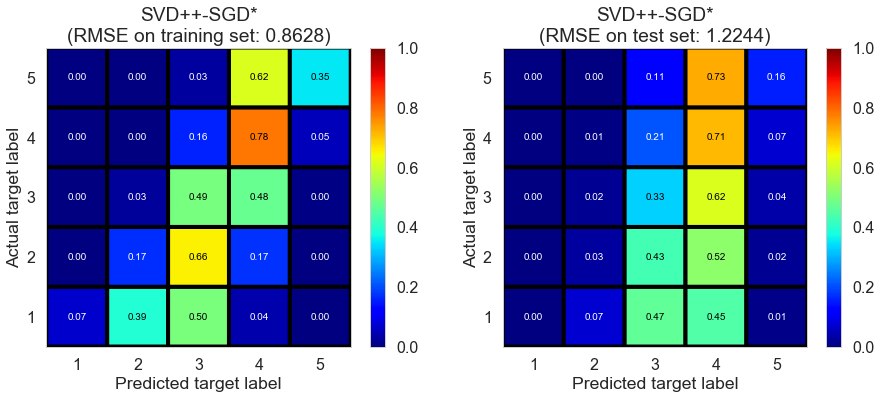


NMF-SGD*
Fitting time: 4.182656764984131 s.
RMSE on training set: 0.3101590246142951.
RMSE on test set: 1.4083090584030713.
r2 on training set: 0.9467865784562968.
r2 on test set: -0.09077671618630934.
Classification accuracy on training set: 0.9022147105950525.
Classification accuracy on test set: 0.2799855134494452.


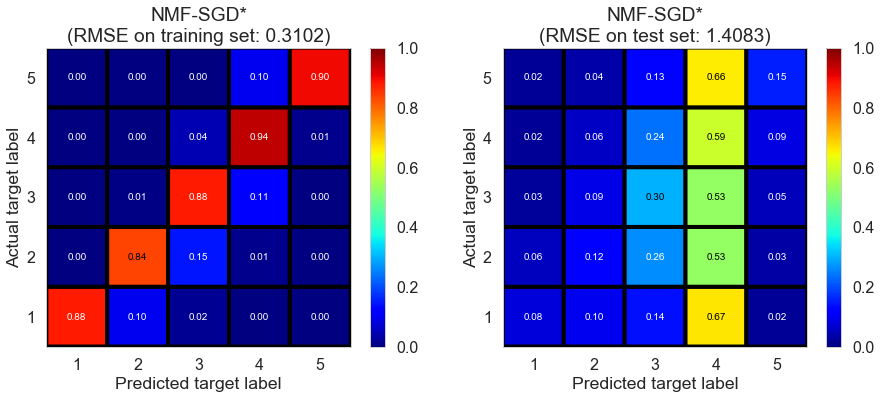


Slope one*
Fitting time: 0.7066352367401123 s.
RMSE on training set: 0.3621632400407551.
RMSE on test set: 1.4199677905767503.
r2 on training set: 0.9274460479669783.
r2 on test set: -0.10891153236465212.
Classification accuracy on training set: 0.8689830768893083.
Classification accuracy on test set: 0.3058308365982945.


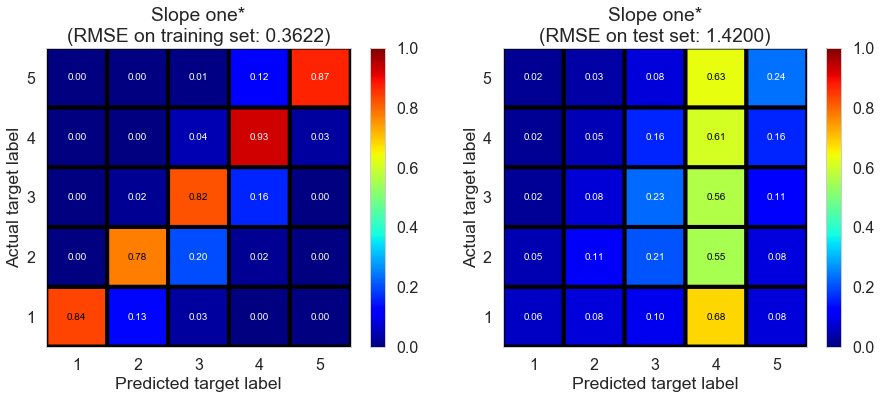


Co-clustering*
Fitting time: 3.995741367340088 s.
RMSE on training set: 0.704978639505864.
RMSE on test set: 1.3688668337045704.
r2 on training set: 0.7250813159450897.
r2 on test set: -0.030533978068670864.
Classification accuracy on training set: 0.6573015211045019.
Classification accuracy on test set: 0.32729727060217956.


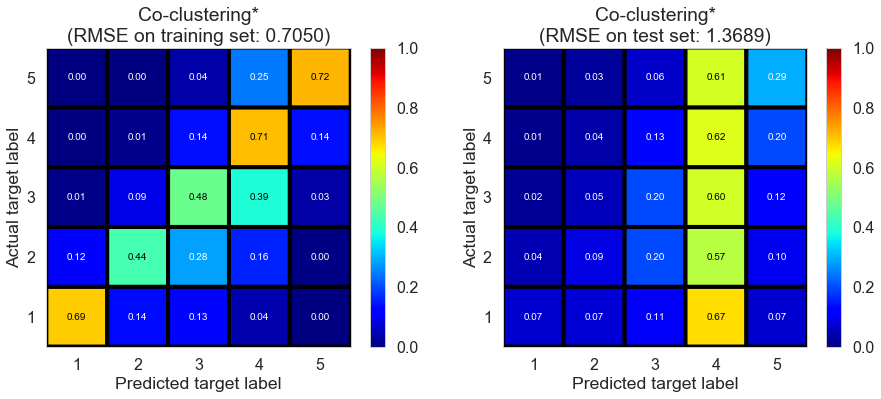


Wall time: 2min 38s


In [9]:
%%time

estimators = IO(data_dir + 'results/estimators.pkl').read_pickle()
is_successful = IO(data_dir + 'results/is_successful.pkl').read_pickle()

for i in range(len(estimators)):
    if is_successful[i]:
        print_results(estimators[i], model_names[i], X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, \
                      figname=fignames[i])

del estimators